In [ ]:
import pandas as pd


train_data = pd.read_csv("/Users/dhanalakshmijothi/Desktop/Kaggle/titanic/train.csv")
test_data = pd.read_csv("/Users/dhanalakshmijothi/Desktop/Kaggle/titanic/test.csv")

print(train_data.head())
print(test_data.head())

In [4]:
missing_values = train_data.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#Categorise the features

Categorical : Cabin, Embarked

Numerical : Age

3️⃣ Handle Categorical Features

Let’s look at the number of missing values:

Cabin: 687 — too many!

Embarked: 2 — manageable 😀

In [ ]:
#How to Impute Small Missing Counts
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0]) 

In [ ]:
# How to Impute High Missing Counts

train_data['Cabin_deck'] = train_data['Cabin'].str[0]
test_data['Cabin_deck'] = test_data['Cabin'].str[0]

train_data['Cabin_deck'] = train_data['Cabin_deck'].fillna('U')
test_data['Cabin_deck'] = test_data['Cabin_deck'].fillna('U')

<function matplotlib.pyplot.show(close=None, block=None)>

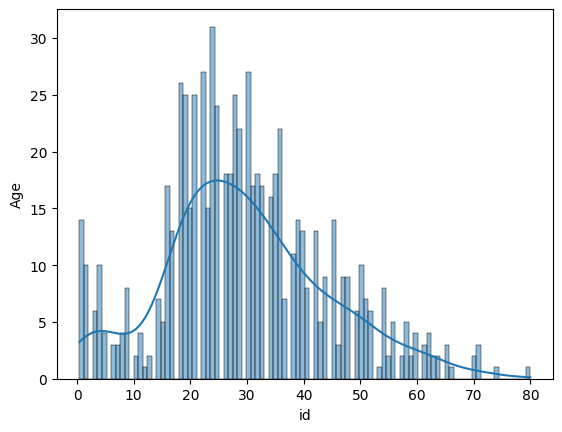

In [5]:
#Handle Numerical Features
import seaborn as sns
import matplotlib.pyplot as plt

Age_distribution = pd.DataFrame ({
    'id': train_data['PassengerId'],
    'Age': train_data['Age']
})

sns.histplot(Age_distribution, x='Age', bins=100, kde=True)
plt.xlabel('id')
plt.ylabel('Age')
plt.show

In [ ]:

# we observe that Age is slightly right-skewed. Hence, imputing with the median is a better choice than the mean:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())